# Spatial Analysis in Geology using R

## by Pedro Nogueira

<span style="color:red;"> 
    <h1> 12. Handling spatial data </h1>
</span>

In [1]:
#12-00
# Settings


# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Part II"


<span style="color:green;"> 
    <h2> 12. </h2>
</span>

In [11]:
#12-01/01
# Load the libraries
library(sp)
library(sf)

# Create an ‘sp’ package object
coords = matrix(c(1, 2, 3, 4), ncol = 2)
sp_points = SpatialPoints(coords)

# Convert to ‘sf’ object
sf_points = as(sp_points, "sf")

In [12]:
#12-01/02
# Create an ‘sf’ object
coords = matrix(c(1, 2, 3, 4), ncol = 2)
sf_points = st_as_sf(data.frame(x = coords[, 1], y = coords[, 2]), coords = c("x", "y"))

# Convert to ‘sp’ package object
sp_points2 = as(sf_points, "Spatial")

In [13]:
class(sp_points)
class(sf_points)
class(sp_points2)

[1] "SpatialPoints"
attr(,"package")
[1] "sp"

[1] "sf"         "data.frame"

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

In [14]:
#12-01/03
# Verify the sp_points
str(sp_points)

# Verify the sf_points
str(sf_points)

Formal class 'SpatialPoints' [package "sp"] with 3 slots
  ..@ coords     : num [1:2, 1:2] 1 2 3 4
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:2] "coords.x1" "coords.x2"
  ..@ bbox       : num [1:2, 1:2] 1 3 2 4
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "coords.x1" "coords.x2"
  .. .. ..$ : chr [1:2] "min" "max"
  ..@ proj4string:Formal class 'CRS' [package "sp"] with 1 slot
  .. .. ..@ projargs: chr NA
Classes ‘sf’ and 'data.frame':	2 obs. of  1 variable:
 $ geometry:sfc_POINT of length 2; first list element:  'XY' num  1 3
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: 
  ..- attr(*, "names")= chr(0) 


<span style="color:green;"> 
    <h2> 12.1 Geometries and projection </h2>
</span>

In [15]:
#12-02/01
# Use meuse dataset
data(meuse)

# Create data frame
meuse_df = meuse

# Verify structure of the dataset
str(meuse_df)

'data.frame':	155 obs. of  14 variables:
 $ x      : num  181072 181025 181165 181298 181307 ...
 $ y      : num  333611 333558 333537 333484 333330 ...
 $ cadmium: num  11.7 8.6 6.5 2.6 2.8 3 3.2 2.8 2.4 1.6 ...
 $ copper : num  85 81 68 81 48 61 31 29 37 24 ...
 $ lead   : num  299 277 199 116 117 137 132 150 133 80 ...
 $ zinc   : num  1022 1141 640 257 269 ...
 $ elev   : num  7.91 6.98 7.8 7.66 7.48 ...
 $ dist   : num  0.00136 0.01222 0.10303 0.19009 0.27709 ...
 $ om     : num  13.6 14 13 8 8.7 7.8 9.2 9.5 10.6 6.3 ...
 $ ffreq  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ soil   : Factor w/ 3 levels "1","2","3": 1 1 1 2 2 2 2 1 1 2 ...
 $ lime   : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ landuse: Factor w/ 15 levels "Aa","Ab","Ag",..: 4 4 4 11 4 11 4 2 2 15 ...
 $ dist.m : num  50 30 150 270 380 470 240 120 240 420 ...


In [16]:
#12-02/02
# Create a new sp variable
meuse_sp = meuse_df
# Assign the coordinates
coordinates(meuse_sp) = c("x","y")
# Verify the new data type
str(meuse_sp)

Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	155 obs. of  12 variables:
  .. ..$ cadmium: num [1:155] 11.7 8.6 6.5 2.6 2.8 3 3.2 2.8 2.4 1.6 ...
  .. ..$ copper : num [1:155] 85 81 68 81 48 61 31 29 37 24 ...
  .. ..$ lead   : num [1:155] 299 277 199 116 117 137 132 150 133 80 ...
  .. ..$ zinc   : num [1:155] 1022 1141 640 257 269 ...
  .. ..$ elev   : num [1:155] 7.91 6.98 7.8 7.66 7.48 ...
  .. ..$ dist   : num [1:155] 0.00136 0.01222 0.10303 0.19009 0.27709 ...
  .. ..$ om     : num [1:155] 13.6 14 13 8 8.7 7.8 9.2 9.5 10.6 6.3 ...
  .. ..$ ffreq  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ soil   : Factor w/ 3 levels "1","2","3": 1 1 1 2 2 2 2 1 1 2 ...
  .. ..$ lime   : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
  .. ..$ landuse: Factor w/ 15 levels "Aa","Ab","Ag",..: 4 4 4 11 4 11 4 2 2 15 ...
  .. ..$ dist.m : num [1:155] 50 30 150 270 380 470 240 120 240 420 ...
  ..@ coords.nrs : int [1:2] 1 

In [17]:
#12-02/03
# Assign a crs to meuse_sp
proj4_meuse = "+proj=sterea +lat_0=52.1561605555556 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.4171,50.3319,465.5524,1.9342,-1.6677,9.1019,4.0725 +units=m +no_defs +type=crs"

proj4string(meuse_sp) = CRS(proj4_meuse)

In [18]:
#12-03
# Convert the data frame to an sf object with geometry and crs
meuse_sf = st_as_sf(meuse_df, coords = c("x", "y"), crs = 28992)

In [19]:
#12-04
# create a new projection object
new_proj = CRS("+proj=longlat +datum=WGS84")

# reproject the data
meuse_sp_reproj = spTransform(meuse_sp, new_proj)

# check the new projection
proj4string(meuse_sp_reproj)

[1] "+proj=longlat +datum=WGS84 +no_defs"

In [22]:
#12-04/02
# Define the target CRS (WGS84)
new_crs = st_crs(4326)

# Reproject the sf object to WGS84 using st_transform()
meuse_sf_wgs84 = st_transform(meuse_sf, crs = new_crs)

<span style="color:green;"> 
    <h2> 12.2 Buffering </h2>
</span>

In [ ]:
#12-05
# Load the libraries
library(leaflet)

# Load the Meuse dataset
data(meuse)

# Define the url for the icon
ss_icon_url = "https://wiki.openstreetmap.org/w/images/thumb/e/e3/Volcano-8.svg/8px-Volcano-8.svg.png"

# Create data frame
meuse_df = meuse

# Convert the data frame to an sf object with geometry and crs
meuse_sf = st_as_sf(meuse_df, coords = c("x", "y"), crs = 28992)

# Create a buffer of 100m around the Meuse points
meuse_buf = st_buffer(meuse_sf, dist = 100)

# Transform the coordinates to be plotable in leaflet
meuse_sf_wgs84 = st_transform(meuse_sf, crs = 4326)
meuse_buf_wgs84 = st_transform(meuse_buf, crs = 4326)

# Plot the buffer using leaflet
leaflet() %>%
    addTiles() %>%
    addPolygons(data = meuse_buf_wgs84, group="Buffer", fillOpacity = 0.2) %>%
    addMarkers(data = meuse_sf_wgs84,group="Marks",
    icon = makeIcon(ss_icon_url, iconWidth = 10, iconHeight = 10),
    popup = ~paste("Cadmium: ", meuse_buf$cadmium)) %>%
    addLayersControl(overlayGroups = c("Buffer","Marks"))

<span style="color:green;"> 
    <h2> 12.3 Subsetting spatial data </h2>
</span>

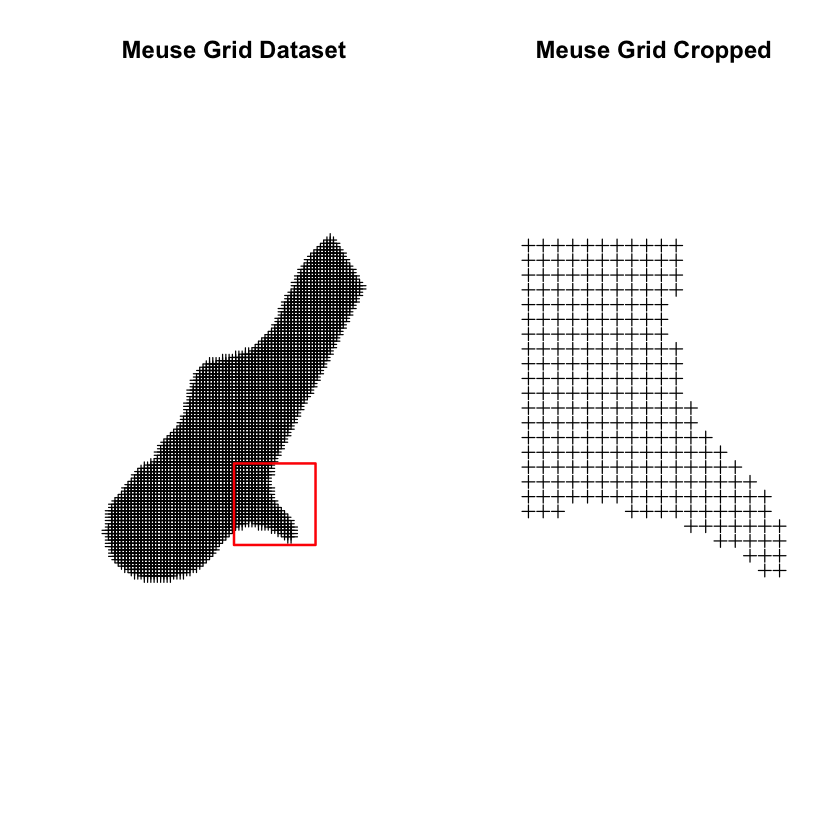

In [23]:
#12-06
# Load the libraries
library(raster)

# Load example dataset
data(meuse.grid)

# Create a copy of meuse.grid
meuse_grid_sp = meuse.grid

# Create the sp object
coordinates(meuse_grid_sp) = c("x", "y")
proj4string(meuse_grid_sp) = CRS("epsg:28992")

# Define the crop extent
crop_extent = c(180000, 330000, 181000, 331000)

# Crop the dataset
meuse_grid_cropped = crop(meuse_grid_sp, crop_extent)

# Plot the results
par(mfrow=c(1,2))
plot(meuse_grid_sp, main="Meuse Grid Dataset")
rect(crop_extent[1], crop_extent[2], crop_extent[3], crop_extent[4], border = "red", lwd = 2)
plot(meuse_grid_cropped, main="Meuse Grid Cropped")

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


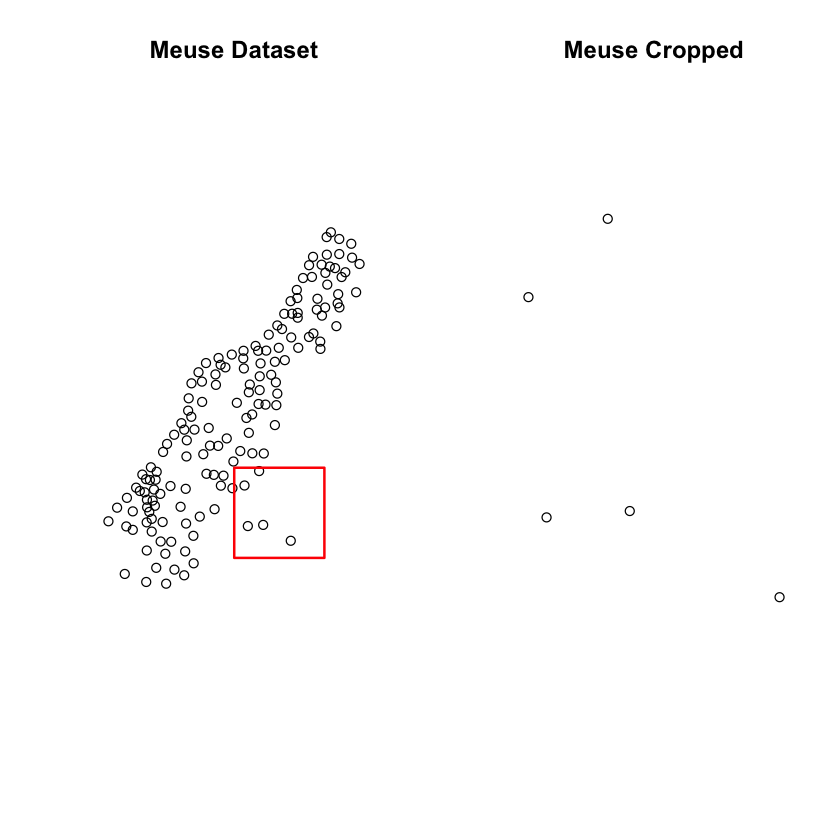

In [32]:
#12-07
# Define meuse available data
data(meuse)

# Convert to an sf object
meuse_sf = st_as_sf(meuse, coords = c("x", "y"), crs = 28992)

# Create a second sf object to use as the crop extent
crop_extent = st_bbox(c(xmin = 180000, ymin=330000, xmax=181000, ymax=331000), crs = st_crs(meuse_sf))

# Crop the meuse sf object to the extent
meuse_cropped_sf = st_crop(meuse_sf, crop_extent)

# plot the results
par(mfrow=c(1,2))
plot(meuse_sf$geometry, main="Meuse Dataset")
rect(crop_extent[1], crop_extent[2], crop_extent[3], crop_extent[4], border = "red", lwd = 2)
plot(meuse_cropped_sf$geometry, main="Meuse Cropped")

In [34]:
#12-08/01
# Load the libraries
library(osmdata)
library(leaflet)
library(sf)

# Use opq to fetch the OSM data for the grass
osm_query = opq(bbox = getbb("Meers, Stein, Netherlands"))

# Define the feature for the grass
osm_query_grass = add_osm_feature(osm_query, key="landuse", value = "grass")

# Retrieve the grass
meers_grass = osmdata_sf(osm_query_grass)

# Plot the way on a leaflet map
leaflet() %>%
    addTiles() %>%
    addPolygons(data = meers_grass$osm_polygons, color = "purple", weight = 2)

HTML widgets cannot be represented in plain text (need html)

In [ ]:
#12-08/02
# Create a polygons only variable
meuse_grass = meers_grass$osm_polygons

# Clip the sample points
meuse_smpl_grass = st_intersection(meuse_sf_wgs84, meuse_grass)

In [ ]:
#12-08/03
# Url for icons to addMarkers in leaflet
ss_icon_url = "https://wiki.openstreetmap.org/w/images/thumb/e/e3/Volcano-8.svg/8px-Volcano-8.svg.png"
grass_icon_url = "https://wiki.openstreetmap.org/w/images/a/ad/Social_amenity_darken_80-16.svg"

# Plot the clipped points on a leaflet map
leaflet() %>%
    addTiles() %>%
    addMarkers(
    data = meuse_sf_wgs84, group="All samples",
    icon = makeIcon(ss_icon_url, iconWidth = 10, iconHeight = 10),
    popup = ~paste("Cadmium: ", meuse_sf$cadmium)) %>%
    addMarkers( data = meuse_smpl_grass, group="Grass",
        icon = makeIcon(grass_icon_url, iconWidth = 20, iconHeight = 20),
        popup = ~paste("Cadmium: ", meuse_smpl_grass$cadmium)) %>%
        addLayersControl(overlayGroups = c("All samples","Grass"))

In [ ]:
#12-08/04
# Verify the variable names
names(meuse_df)
names(meuse_grass)
names(meuse_smpl_grass)

<span style="color:green;"> 
    <h2> 12.4 Spatial queries (logical) </h2>
</span>

In [ ]:
#12-09/01
# Create two polygons as ‘sf’ objects
big_square = st_polygon(
list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
small_square1 = st_polygon(
list(rbind(c(0.2, 0.2), c(0.2, 0.4), c(0.4, 0.4), c(0.4, 0.2), c(0.2,0.2))))
small_square2 = st_polygon(
list(rbind(c(0.6, 0.6), c(0.6,0.8), c(0.8, 0.8), c(0.8, 0.6), c(0.6,0.6))))

# Plot
par(mfrow=c(1,1))
plot(big_square, main="Two small squares inside a bigger square")
plot(small_square1, col="red", add=T)
plot(small_square2, col="blue", add=T)

In [ ]:
#12-09/02
# Test whether small_square1 is contained in square
contains1 = st_contains(big_square, small_square1)

#Test whether small_square is contained in small_square2
contains2 = st_contains(small_square1, small_square2)

# Print the results
contains1
contains2

In [ ]:
#12-10/01
# Create three polygons as ‘sf’ objects
big_square = st_polygon(
    list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
triangle = st_polygon(
    list(rbind(c(1, 0), c(1, 1), c(2, 0.5), c(1, 0))))
small_square1 = st_polygon(
    list(rbind(c(0.6, 0.6), c(0.6,0.8), c(0.8, 0.8), c(0.8, 0.6), c(0.6,0.6))))

# Plot
par(mfrow=c(1,1), xpd = TRUE)
plot(big_square, main="Two squares and a triangle")
plot(triangle, col="red", add=T)
plot(small_square1, col="blue", add=T)

In [ ]:
#12-10/02
# Test whether the geometries touch
touches1 = st_touches(big_square, triangle)
touches2 = st_touches(big_square, small_square1)

# Verify the results
touches1
touches2

In [ ]:
12-11/01
# Create one square and a line
square = st_polygon(
    list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
line = st_linestring(rbind(c(-.1, 0), c(0.5,0.5), c(0.7,0.9)))

# Plot
plot(square, main="One square and a line",)
plot(line, col="red", add=TRUE)

In [ ]:
#12-11/02
# Test whether square crosses line
crosses = st_crosses(square, line)

# Print the result
crosses

In [ ]:
12-12/01
# Create two polygons as ‘sf’ objects
square = st_polygon(
    list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
triangle = st_polygon(
    list(rbind(c(0.5, 0.5), c(1.1, 0.9), c(0.5, 0.9), c(0.5, 0.5))))

# Plot
plot(square, main="One square and a triangle",)
plot(triangle, col="red", add=TRUE)

In [ ]:
#12-12/02
# Test whether square overlaps triangle
overlaps = st_overlaps(square, triangle)

# Print the result
overlaps

In [ ]:
#12-13/01
# Create two polygons as ‘sf’ objects
big_square = st_polygon(
    list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
small_square = st_polygon(
    list(rbind(c(0.2, 0.2), c(0.2, 0.4), c(0.4, 0.4), c(0.4, 0.2), c(0.2,0.2))))

# Plot
plot(square, main="One square and another square",)
plot(small_square, col="red", add=TRUE)

In [ ]:
#12-13/02
# Test whether square is within small_square and the opposite
within1 = st_within(big_square, small_square)
within2 = st_within(small_square, big_square)

# Print the result
within1
within2

In [ ]:
#12-14/01
# Create the ‘sf’ objects
big_square = st_polygon(
list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
line1 = st_linestring(rbind(c(-.1, 0), c(.5, .5), c(.7, .9)))
line2 = st_linestring(rbind(c(.1, 0), c(.5, .5), c(.9, .9)))
line3 = st_linestring(rbind(c(-.2, .2), c(-.1, .5), c(-.2, .6)))
line4 = st_linestring(rbind(c(.1, .9), c(.3, .5), c(.7, .6)))

# Plot
plot(big_square, main="A square and 4 lines")
plot(line1, col="red", add=TRUE, lwd=3)
plot(line2, col="blue", add=TRUE, lwd=3)
plot(line3, col="green", add=TRUE, lwd=3)
plot(line4, col="black", add=TRUE, lwd=3)

In [ ]:
#12-14/02
# Test whether square intersects rect
intersects1 = st_intersects(big_square, line1)
intersects2 = st_intersects(big_square, line2)
intersects3 = st_intersects(big_square, line3)
intersects4 = st_intersects(big_square, line4)

# Verify the results
intersects1
intersects2
intersects3
intersects4

<span style="color:green;"> 
    <h2> 12.5 Spatial calculations (numeric) </h2>
</span>

In [ ]:
#12-15
# Create a simple square polygon
square = st_polygon(
    list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))

# Compute the centroid of the polygon
centroid = st_centroid(square)

# Print the centroid
centroid

# Plot the square and the centroid
plot(square, main = "A square with its centroid")
points(x=centroid[1], y=centroid[2], pch=2, cex=1, col="red")

In [ ]:
#12-16
# Create a simple rectangle polygon as an ‘sf’ object
rect = st_polygon(
    list(rbind(c(0, 0), c(0, 2), c(1, 2), c(1, 0), c(0, 0))))

# Compute the area of the polygon
area = st_area(rect)

# Print the area
area

In [ ]:
#12-17
# Create a simple line as an ‘sf’ object
line = st_linestring(
    rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(2, 0)))

# Compute the length of the line
length = st_length(line)

# Print the length
length

In [ ]:
#12-18
# Create two points as ‘sf’ objects
point1 = st_point(c(0, 0))
point2 = st_point(c(1, 1))

# Compute the distance between the two points
distance = st_distance(point1, point2)

# Print the distance
distance

<span style="color:green;"> 
    <h2> 12.6 Spatial operation (geometric) </h2>
</span>

In [ ]:
#12-19/01
# Create two polygons as ‘sf’ objects
square = st_polygon(
    list(rbind(c(0, 0), c(0, 1), c(1, 1), c(1, 0), c(0, 0))))
triangle = st_polygon(
    list(rbind(c(0.5, 0.5), c(1.1, 0.9), c(0.5, 0.9), c(0.5, 0.5))))

# Plot
par(mfrow=c(1,2), xpd = TRUE)
plot(square, main="A square and a Triangle")
plot(triangle, col="red", add=TRUE)

In [ ]:
#12-19/02
# Calculate the symmetric difference of square and rect
sym_diff = st_sym_difference(square, triangle)

# plot
plot(square, main="The difference")
plot(triangle, col="red", add=TRUE)
plot(sym_diff, add=TRUE, cex=2, col="blue")

In [ ]:
#12-20
# The geometries
par(mfrow=c(1,2), xpd=TRUE)
plot(square, main="A square and a triangle")
plot(triangle, col="red", add=TRUE)

# Calculate the union of square and rect
union = st_union(square, triangle)

# Plot the result
plot(union, col="blue", main = "The union")

In [ ]:
#12-21
# The geometries
par(mfrow=c(1,2), xpd=TRUE)
plot(square, main="A square and a triangle")
plot(triangle, col="red", add=TRUE)

# Calculate the symmetric difference of square and rect
diff = st_difference(square, triangle)

# plot
plot(diff, main="The difference", col="blue")

In [ ]:
#12-22
# The geometries
par(mfrow=c(1,2), xpd = TRUE)
plot(square, main="A square and a triangle")
plot(triangle, col="red", add=TRUE)

# Perform intersection between the two ‘sf’ objects
inter = st_intersection(square, triangle)

# Plot the resulting ‘sf’ object
plot(inter, col = "blue", main="The intersection")

<span style="color:blue;"> 
    <h1> References </h1>
</span>

Baddeley, A., Rubak, E., & Turner, R. (2016). Spatial point patterns: methodology and applications with R. CRC press.

Pebesma, E., & Bivand, R. (2023). Spatial data science: With applications in R. CRC Press. 300p. 